In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Define path to your dataset
base_path = "/content/drive/MyDrive/Eye Protection YOLOv5"
train_images_dir = os.path.join(base_path, "train/images")
train_labels_dir = os.path.join(base_path, "train/labels")
val_images_dir = os.path.join(base_path, "valid/images")
val_labels_dir = os.path.join(base_path, "valid/labels")
test_images_dir = os.path.join(base_path, "test/images")
test_labels_dir = os.path.join(base_path, "test/labels")

# Check if dataset is visible
print("Train Images:", len(os.listdir(train_images_dir)))
print("Train Labels:", len(os.listdir(train_labels_dir)))
print("Validation Images:", len(os.listdir(val_images_dir)))
print("Validation Labels:", len(os.listdir(val_labels_dir)))
print("Test Images:", len(os.listdir(test_images_dir)))
print("Test Labels:", len(os.listdir(test_labels_dir)))


Train Images: 4400
Train Labels: 4400
Validation Images: 1256
Validation Labels: 1273
Test Images: 627
Test Labels: 627


In [ ]:
!pip install albumentations --quiet
!pip install opencv-python-headless --quiet

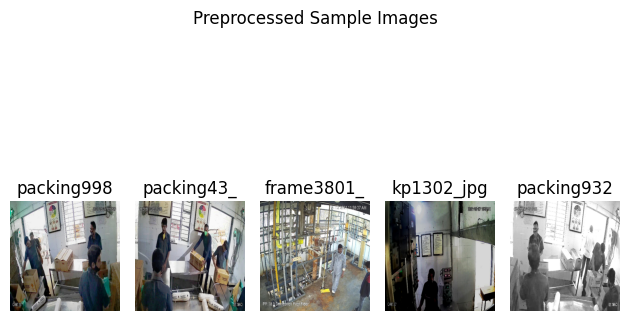

In [ ]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import random

train_img_dir = os.path.join(base_path, 'train', 'images')
val_img_dir = os.path.join(base_path, 'valid', 'images')
test_img_dir = os.path.join(base_path, 'test', 'images')


# Albumentations preprocessing pipeline
transform = A.Compose([
    A.Resize(512, 512),                        # Resize to 512x512
    A.HorizontalFlip(p=0.5),                   # Random horizontal flip
    A.RandomRotate90(p=0.5),                   # Random 90-degree rotation
    A.RandomBrightnessContrast(p=0.5),         # Random brightness/contrast
    A.Normalize(mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0)),  # Normalize [0,1]
    ToTensorV2()
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Sample preprocessing function
def preprocess_and_display(image_dir, num_samples=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    sample_images = random.sample(image_files, min(num_samples, len(image_files)))

    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Dummy bounding box and class label (used only for visualization)
        dummy_bbox = [[0.5, 0.5, 0.3, 0.3]]  # YOLO format: x_center, y_center, width, height
        dummy_class = [0]

        transformed = transform(image=img, bboxes=dummy_bbox, class_labels=dummy_class)
        transformed_image = transformed['image'].permute(1, 2, 0).cpu().numpy()

        plt.subplot(1, num_samples, i+1)
        plt.imshow(transformed_image)
        plt.axis('off')
        plt.title(img_file[:10])

    plt.suptitle('Preprocessed Sample Images')
    plt.tight_layout()
    plt.show()

# Run and visualize preprocessing
preprocess_and_display(train_img_dir)

In [ ]:
# Step 1: Install Ultralytics if not already installed
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.8 MB/s eta 0:00:00


In [ ]:
# Import required libraries
from ultralytics import YOLO
import torch

# Load the improved YOLOv5 'u' variant model
model = YOLO("yolov5su.pt")

# Set path to your Roboflow data.yaml (in your Google Drive)
data_yaml_path = "/content/drive/MyDrive/Eye Protection YOLOv5/data.yaml"

# Train the model
model.train(
    data=data_yaml_path,
    epochs=10,
    imgsz=512,
    batch=16,
    name='eye_protection_yolov5',
    project='/content/runs/detect',
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

# Evaluate the model on the validation set
metrics = model.val()

Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Eye Protection YOLOv5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5su.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=eye_protection_yolov52, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

train: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/train/labels... 4400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4400/4400 [31:14<00:00,  2.35it/s]


train: New cache created: /content/drive/MyDrive/Eye Protection YOLOv5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.4±0.1 MB/s, size: 140.0 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [08:37<00:00,  2.43it/s]


val: New cache created: /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache
Plotting labels to /content/runs/detect/eye_protection_yolov52/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/runs/detect/eye_protection_yolov52
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.42G      2.112      3.191      1.187         19        512: 100%|██████████| 275/275 [02:44<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:30<00:00,  1.32it/s]

                   all       1256       1686      0.703      0.693      0.781      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.72G      1.796      1.206      1.067         19        512: 100%|██████████| 275/275 [01:28<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]


                   all       1256       1686      0.644      0.588      0.617      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.76G      1.742      1.104      1.052         21        512: 100%|██████████| 275/275 [01:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.61it/s]

                   all       1256       1686      0.796      0.764       0.83      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.79G      1.685      1.003      1.034         21        512: 100%|██████████| 275/275 [01:28<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]

                   all       1256       1686      0.783       0.78      0.847      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.82G      1.664     0.9497      1.019         22        512: 100%|██████████| 275/275 [01:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.62it/s]

                   all       1256       1686      0.794      0.809      0.874      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.85G      1.587     0.8982     0.9968         20        512: 100%|██████████| 275/275 [01:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]

                   all       1256       1686      0.796      0.811      0.888      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.88G      1.549     0.8628     0.9853         22        512: 100%|██████████| 275/275 [01:27<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.58it/s]

                   all       1256       1686       0.86      0.888      0.949      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.91G      1.505     0.8007      0.975         22        512: 100%|██████████| 275/275 [01:30<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.64it/s]

                   all       1256       1686      0.851      0.895      0.951      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.94G      1.478     0.7619     0.9644         24        512: 100%|██████████| 275/275 [01:27<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:16<00:00,  2.47it/s]

                   all       1256       1686      0.887      0.872      0.954       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.97G      1.427     0.7244     0.9568         24        512: 100%|██████████| 275/275 [01:28<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.66it/s]

                   all       1256       1686      0.881      0.904      0.961      0.562



10 epochs completed in 0.317 hours.
Optimizer stripped from /content/runs/detect/eye_protection_yolov52/weights/last.pt, 18.5MB
Optimizer stripped from /content/runs/detect/eye_protection_yolov52/weights/best.pt, 18.5MB

Validating /content/runs/detect/eye_protection_yolov52/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:15<00:00,  2.58it/s]


                   all       1256       1686      0.881      0.904      0.961      0.562
               Goggles        746        827      0.884       0.94      0.974      0.577
            NO-Goggles        679        859      0.879      0.868      0.948      0.547
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov52
Ultralytics 8.3.178 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 84 layers, 9,112,310 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 60.9±12.3 MB/s, size: 129.5 KB)


val: Scanning /content/drive/MyDrive/Eye Protection YOLOv5/valid/labels.cache... 1256 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1256/1256 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:23<00:00,  3.43it/s]


                   all       1256       1686      0.881      0.904      0.961      0.561
               Goggles        746        827      0.884       0.94      0.974      0.576
            NO-Goggles        679        859      0.879      0.868      0.948      0.545
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/runs/detect/eye_protection_yolov522


In [ ]:
# Get mean metrics for YOLOv5 evaluation
mp, mr, map50, map5095 = metrics.box.mean_results()

print("Evaluation Results:")
print(f"Mean Precision (mp): {mp:.4f}")
print(f"Mean Recall (mr): {mr:.4f}")
print(f"mAP@50: {map50:.4f}")
print(f"mAP@50–95: {map5095:.4f}")

Evaluation Results:
Mean Precision (mp): 0.8813
Mean Recall (mr): 0.9040
mAP@50: 0.9606
mAP@50–95: 0.5606


In [ ]:
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install -q effdet timm albumentations opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Uninstall all versions first
!pip uninstall -y effdet
!pip uninstall -y efficientdet-pytorch  # Just in case
!rm -rf /usr/local/lib/python3.11/dist-packages/effdet*

# Install from official GitHub repo (includes DetBenchEval)
!pip install -q git+https://github.com/rwightman/efficientdet-pytorch.git

# Required imports
import torch
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet

print("EfficientDet components imported successfully (using DetBenchTrain)")

Found existing installation: effdet 0.4.1
Uninstalling effdet-0.4.1:
  Successfully uninstalled effdet-0.4.1
  Preparing metadata (setup.py) ... done
EfficientDet components imported successfully (using DetBenchTrain)


In [ ]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from effdet import get_efficientdet_config, EfficientDet, DetBenchTrain
from effdet.efficientdet import HeadNet
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class details
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Transform
transform = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    ToTensorV2()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# Convert YOLO to Pascal VOC
def yolo_to_voc(box, img_w, img_h):
    x_c, y_c, w, h = box
    x_min = (x_c - w / 2) * img_w
    y_min = (y_c - h / 2) * img_h
    x_max = (x_c + w / 2) * img_w
    y_max = (y_c + h / 2) * img_h
    return [x_min, y_min, x_max, y_max]

# Dataset class
class EyeProtectionDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w = img.shape[:2]

        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    class_id, x_c, y_c, w, h = map(float, line.strip().split())
                    box = yolo_to_voc([x_c, y_c, w, h], img_w, img_h)
                    x_min, y_min, x_max, y_max = box
                    if x_max > x_min and y_max > y_min:
                        boxes.append(box)
                        labels.append(int(class_id))

        if self.transform:
            transformed = self.transform(image=img, bboxes=boxes, labels=labels)
            img = transformed['image']
            boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
            labels = torch.tensor(transformed['labels'], dtype=torch.int64)

        target = {'bbox': boxes, 'cls': labels}
        return img, target

# Dataset paths (assumes vars already defined: train_images_dir, etc.)
train_dataset = EyeProtectionDataset(train_images_dir, train_labels_dir, transform=transform)
val_dataset = EyeProtectionDataset(val_images_dir, val_labels_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# EfficientDet model
config = get_efficientdet_config('tf_efficientdet_d0')
config.num_classes = NUM_CLASSES
config.image_size = (512, 512)

net = EfficientDet(config, pretrained_backbone=True)
net.class_net = HeadNet(config, num_outputs=NUM_CLASSES)
model = DetBenchTrain(net, config).to(device)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images = torch.stack(images).to(device)
        boxes = [t['bbox'].to(device) for t in targets]
        labels = [t['cls'].to(device) for t in targets]

        targets_dict = {'bbox': boxes, 'cls': labels}

        optimizer.zero_grad()
        loss_dict = model(images, targets_dict)
        loss = loss_dict['loss']
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

Epoch 1: 100%|██████████| 2200/2200 [07:18<00:00,  5.02it/s]


Epoch 1 Loss: 1739.3591


Epoch 2: 100%|██████████| 2200/2200 [06:43<00:00,  5.46it/s]


Epoch 2 Loss: 1218.1315


Epoch 3: 100%|██████████| 2200/2200 [06:47<00:00,  5.40it/s]


Epoch 3 Loss: 689.1730


Epoch 4: 100%|██████████| 2200/2200 [06:46<00:00,  5.41it/s]


Epoch 4 Loss: 332.9263


Epoch 5: 100%|██████████| 2200/2200 [06:45<00:00,  5.42it/s]


Epoch 5 Loss: 147.0924


Epoch 6: 100%|██████████| 2200/2200 [06:45<00:00,  5.42it/s]


Epoch 6 Loss: 57.3005


Epoch 7: 100%|██████████| 2200/2200 [06:43<00:00,  5.46it/s]


Epoch 7 Loss: 21.1916


Epoch 8: 100%|██████████| 2200/2200 [06:45<00:00,  5.43it/s]


Epoch 8 Loss: 8.3471


Epoch 9: 100%|██████████| 2200/2200 [06:42<00:00,  5.46it/s]


Epoch 9 Loss: 3.2039


Epoch 10: 100%|██████████| 2200/2200 [06:39<00:00,  5.51it/s]

Epoch 10 Loss: 1.5499


In [ ]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Make sure model is in eval mode
model.eval()

all_preds = []
all_targets = []

# Confidence threshold for keeping predictions
CONF_THRESH = 0.1

with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Evaluating"):
        images = torch.stack(images).to(device)

        # Build dummy targets to pass into DetBenchTrain
        dummy_targets = {
            'bbox': [t['bbox'].to(device) for t in targets],
            'cls': [t['cls'].to(device) for t in targets],
            'img_scale': torch.ones(len(images)).to(device),
            'img_size': torch.tensor([[512, 512]] * len(images)).to(device)
        }

        # Get outputs from the training model (DetBenchTrain)
        outputs = model(images, dummy_targets)

        # Extract predictions from raw model output
        dets = outputs['detections'].cpu().numpy()  # shape: [B, 100, 6]

        for i in range(len(dets)):
            boxes = dets[i]
            preds = []
            for box in boxes:
                conf = box[4]
                class_id = int(box[5])

                # Skip low confidence or invalid class
                if conf > CONF_THRESH and class_id in [0, 1]:
                    preds.append(class_id)

            true_labels = targets[i]['cls'].cpu().numpy().tolist()

            # Pad or truncate to ensure consistent length
            if len(preds) < len(true_labels):
                preds += [1] * (len(true_labels) - len(preds))  # pad
            else:
                preds = preds[:len(true_labels)]  # truncate

            all_preds.extend(preds)
            all_targets.extend(true_labels)


# Final unique class check
print("Unique predicted labels:", np.unique(all_preds))
print("Unique true labels:", np.unique(all_targets))

# Fix: Align the evaluation to valid labels
valid_labels = [0, 1]
CLASSES = ['Goggles', 'NO-Goggles']

print("\nClassification Report:")
print(classification_report(all_targets, all_preds, target_names=CLASSES, labels=valid_labels, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(all_targets, all_preds, labels=valid_labels))

Evaluating: 100%|██████████| 628/628 [01:01<00:00, 10.29it/s]

Unique predicted labels: [1]
Unique true labels: [0 1]

Classification Report:
              precision    recall  f1-score   support

     Goggles       1.00      0.00      0.00       827
  NO-Goggles       0.51      1.00      0.68       859

    accuracy                           0.51      1686
   macro avg       0.75      0.50      0.34      1686
weighted avg       0.75      0.51      0.34      1686


Confusion Matrix:
[[  0 827]
 [  0 859]]


In [ ]:
import torch
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection.retinanet import RetinaNetClassificationHead

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class list
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Load pre-trained RetinaNet
model = retinanet_resnet50_fpn(weights="DEFAULT")

# Get in_channels and num_anchors from the existing head
in_channels = model.head.classification_head.cls_logits.in_channels
num_anchors = model.head.classification_head.num_anchors

# Replace classification head for our dataset
model.head.classification_head = RetinaNetClassificationHead(
    in_channels=in_channels,
    num_anchors=num_anchors,
    num_classes=NUM_CLASSES
)

# Move to device
model.to(device)
model.eval()

print("RetinaNet initialized and customized for 2-class object detection.")

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:02<00:00, 62.7MB/s]


RetinaNet initialized and customized for 2-class object detection.


In [ ]:
import os
import cv2
import torch
import time
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.optim as optim
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models.detection.retinanet import RetinaNet_ResNet50_FPN_Weights

# Class setup
CLASSES = ['Goggles', 'NO-Goggles']
NUM_CLASSES = len(CLASSES)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Running on CPU")

# Albumentations transform
transform = A.Compose([
    A.Resize(256, 256),  # smaller size
    A.Normalize(mean=(0, 0, 0), std=(1, 1, 1)),
    ToTensorV2()
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

# YOLO to VOC converter
def yolo_to_voc(box, img_w, img_h):
    x_c, y_c, w, h = box
    x_min = (x_c - w / 2) * img_w
    y_min = (y_c - h / 2) * img_h
    x_max = (x_c + w / 2) * img_w
    y_max = (y_c + h / 2) * img_h
    return [x_min, y_min, x_max, y_max]

# Dataset class
class EyeProtectionDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.jpg', '.txt'))

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_h, img_w = img.shape[:2]

        boxes, labels = [], []
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    class_id, x_c, y_c, w, h = map(float, line.strip().split())
                    box = yolo_to_voc([x_c, y_c, w, h], img_w, img_h)
                    if box[2] > box[0] and box[3] > box[1]:
                        boxes.append(box)
                        labels.append(int(class_id))

        if self.transform:
            transformed = self.transform(image=img, bboxes=boxes, labels=labels)
            img = transformed['image']
            boxes = torch.tensor(transformed['bboxes'], dtype=torch.float32)
            labels = torch.tensor(transformed['labels'], dtype=torch.int64)

        target = {'boxes': boxes, 'labels': labels}
        return img, target

# Paths
train_images_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/train/images'
train_labels_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/train/labels'

# Dataloader
train_dataset = EyeProtectionDataset(train_images_dir, train_labels_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0, pin_memory=True,
                          collate_fn=lambda x: tuple(zip(*x)))

# Load RetinaNet with pretrained weights
from torchvision.models.detection import retinanet_resnet50_fpn
from torchvision.models import ResNet50_Weights

# Load RetinaNet with a pretrained ResNet50 backbone
backbone_weights = ResNet50_Weights.DEFAULT
model = retinanet_resnet50_fpn(weights=None, weights_backbone=backbone_weights, num_classes=NUM_CLASSES)
model = model.to(device)



# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
EPOCHS = 10
model.train()

for epoch in range(EPOCHS):
    start = time.time()
    total_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}")

    for images, targets in loop:
        images = list(img.to(device) for img in images)

        # Convert to expected format
        target_list = []
        for t in targets:
            boxes = t['boxes'].to(device)
            labels = t['labels'].to(device)
            target_list.append({'boxes': boxes, 'labels': labels})

        # Forward + Backward pass
        loss_dict = model(images, target_list)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")
    print(f"Time taken: {(time.time() - start)/60:.2f} mins")


Tesla T4


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 58.6MB/s]
Epoch 1: 100%|██████████| 2200/2200 [15:37<00:00,  2.35it/s, loss=0.396]


Epoch 1 Loss: 0.5911
Time taken: 15.62 mins


Epoch 2: 100%|██████████| 2200/2200 [15:04<00:00,  2.43it/s, loss=0.522]


Epoch 2 Loss: 0.3757
Time taken: 15.08 mins


Epoch 3: 100%|██████████| 2200/2200 [15:04<00:00,  2.43it/s, loss=0.246]


Epoch 3 Loss: 0.3199
Time taken: 15.07 mins


Epoch 4: 100%|██████████| 2200/2200 [15:04<00:00,  2.43it/s, loss=0.442]


Epoch 4 Loss: 0.2772
Time taken: 15.08 mins


Epoch 5: 100%|██████████| 2200/2200 [15:07<00:00,  2.43it/s, loss=0.0889]


Epoch 5 Loss: 0.2469
Time taken: 15.12 mins


Epoch 6: 100%|██████████| 2200/2200 [15:05<00:00,  2.43it/s, loss=0.328]


Epoch 6 Loss: 0.2178
Time taken: 15.09 mins


Epoch 7: 100%|██████████| 2200/2200 [15:05<00:00,  2.43it/s, loss=0.254]


Epoch 7 Loss: 0.1909
Time taken: 15.09 mins


Epoch 8: 100%|██████████| 2200/2200 [15:03<00:00,  2.44it/s, loss=0.112]


Epoch 8 Loss: 0.1737
Time taken: 15.06 mins


Epoch 9:  78%|███████▊  | 1715/2200 [11:43<03:24,  2.37it/s, loss=0.095]

In [ ]:
# Validation dataset path
val_images_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/valid/images'
val_labels_dir = '/content/drive/MyDrive/Eye Protection YOLOv5/valid/labels'

# Create validation dataset
val_dataset = EyeProtectionDataset(val_images_dir, val_labels_dir, transform=transform)

# Validation DataLoader
val_loader = DataLoader(
    val_dataset,
    batch_size=4,        # Adjust as needed
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=lambda x: tuple(zip(*x))
)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

all_preds = []
all_trues = []

CONF_THRESH = 0.5  # Confidence threshold

model.eval()
with torch.no_grad():
    for images, targets in tqdm(val_loader, desc="Evaluating"):
        images = [img.to(device) for img in images]
        outputs = model(images)

        for i, output in enumerate(outputs):
            scores = output['scores'].cpu().numpy()
            labels = output['labels'].cpu().numpy()

            preds = labels[scores > CONF_THRESH].tolist()
            trues = targets[i]['labels'].cpu().numpy().tolist()

            # Fix prediction count mismatch
            if len(preds) < len(trues):
                preds.extend([1] * (len(trues) - len(preds)))  # Default to NO-Goggles
            elif len(preds) > len(trues):
                preds = preds[:len(trues)]  # Trim extra predictions

            all_preds.extend(preds)
            all_trues.extend(trues)

# Final Metrics
print("\nClassification Report:")
print(classification_report(all_trues, all_preds, target_names=CLASSES, zero_division=0))

print("\nConfusion Matrix:")
print(confusion_matrix(all_trues, all_preds))

Evaluating: 100%|██████████| 314/314 [01:40<00:00,  3.13it/s]


Classification Report:
              precision    recall  f1-score   support

     Goggles       0.87      0.87      0.87       827
  NO-Goggles       0.88      0.88      0.88       859

    accuracy                           0.87      1686
   macro avg       0.87      0.87      0.87      1686
weighted avg       0.87      0.87      0.87      1686


Confusion Matrix:
[[719 108]
 [103 756]]
